In [1]:
import pandas as pd
dftrain=pd.read_csv(r"C:\Users\polpi\Desktop\data science\assignments\done\Logistic Regression\Titanic_train.csv")
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
dftrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
dftrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

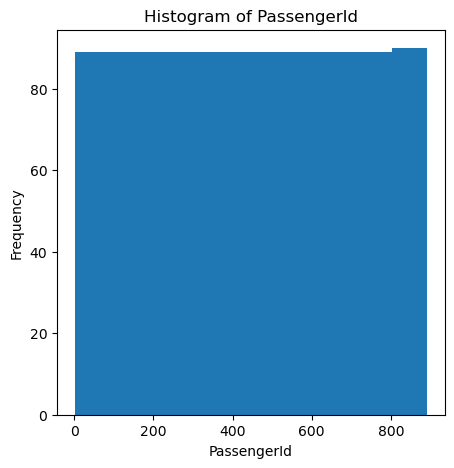

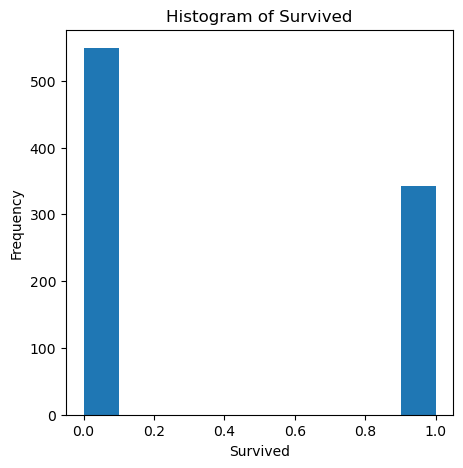

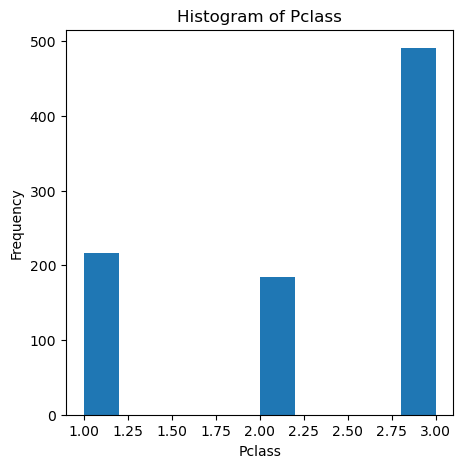

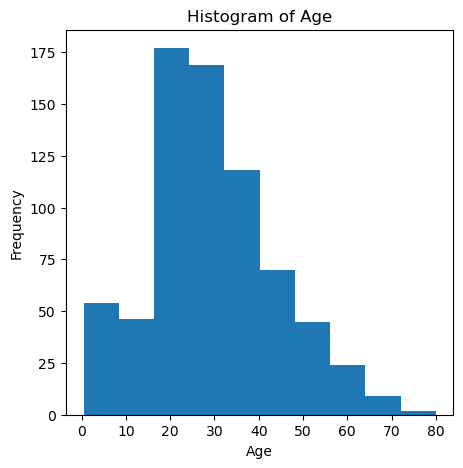

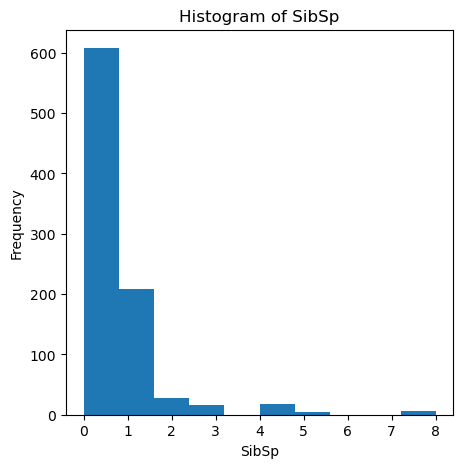

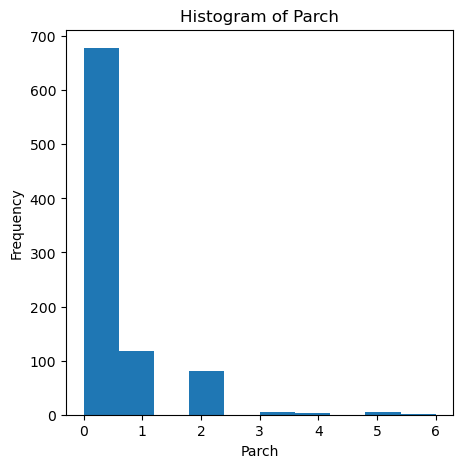

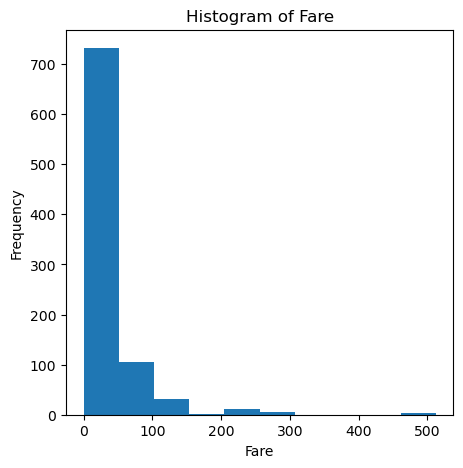

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
dftrain_num = dftrain.select_dtypes(include=['float64', 'int64'])
for col in dftrain_num:
    plt.figure(figsize=(5, 5))
    plt.hist(dftrain_num[col], bins=10)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [5]:
print("Since Age has 177 NAN we will dropna \nhowever, cabin has 687 NAN dropping those will reduce the training data size a lot. \nWe would drop the entire cabin column")
dftrain=dftrain.drop('Cabin',axis=1)
dftrain_cleaned=dftrain.dropna()
dftrain_cleaned

Since Age has 177 NAN we will dropna 
however, cabin has 687 NAN dropping those will reduce the training data size a lot. 
We would drop the entire cabin column


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [6]:
print("For training we would not require the name, Ticket and passengerID column, therefore we would drop them as well")
dftrain_cleaned=dftrain_cleaned.drop(['PassengerId','Name','Ticket'], axis=1)
dftrain_cleaned

For training we would not require the name, Ticket and passengerID column, therefore we would drop them as well


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
unique_embarked = dftrain_cleaned['Embarked'].unique()

print(unique_embarked)

['S' 'C' 'Q']


In [8]:
print("We will use dictionary style to encode")
sex_type={'male':1,'female':0}
embarked_types={'S':2,'C':1,'Q':0}
dftrain_cleaned['Sex'] = dftrain_cleaned['Sex'].map(sex_type)
dftrain_cleaned['Embarked'] = dftrain_cleaned['Embarked'].map(embarked_types)
dftrain_cleaned

We will use dictionary style to encode


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,0
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
889,1,1,1,26.0,0,0,30.0000,1


In [9]:
dftrain_cleaned.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251,1.738764
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.521561
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,2.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


C:\Users\polpi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


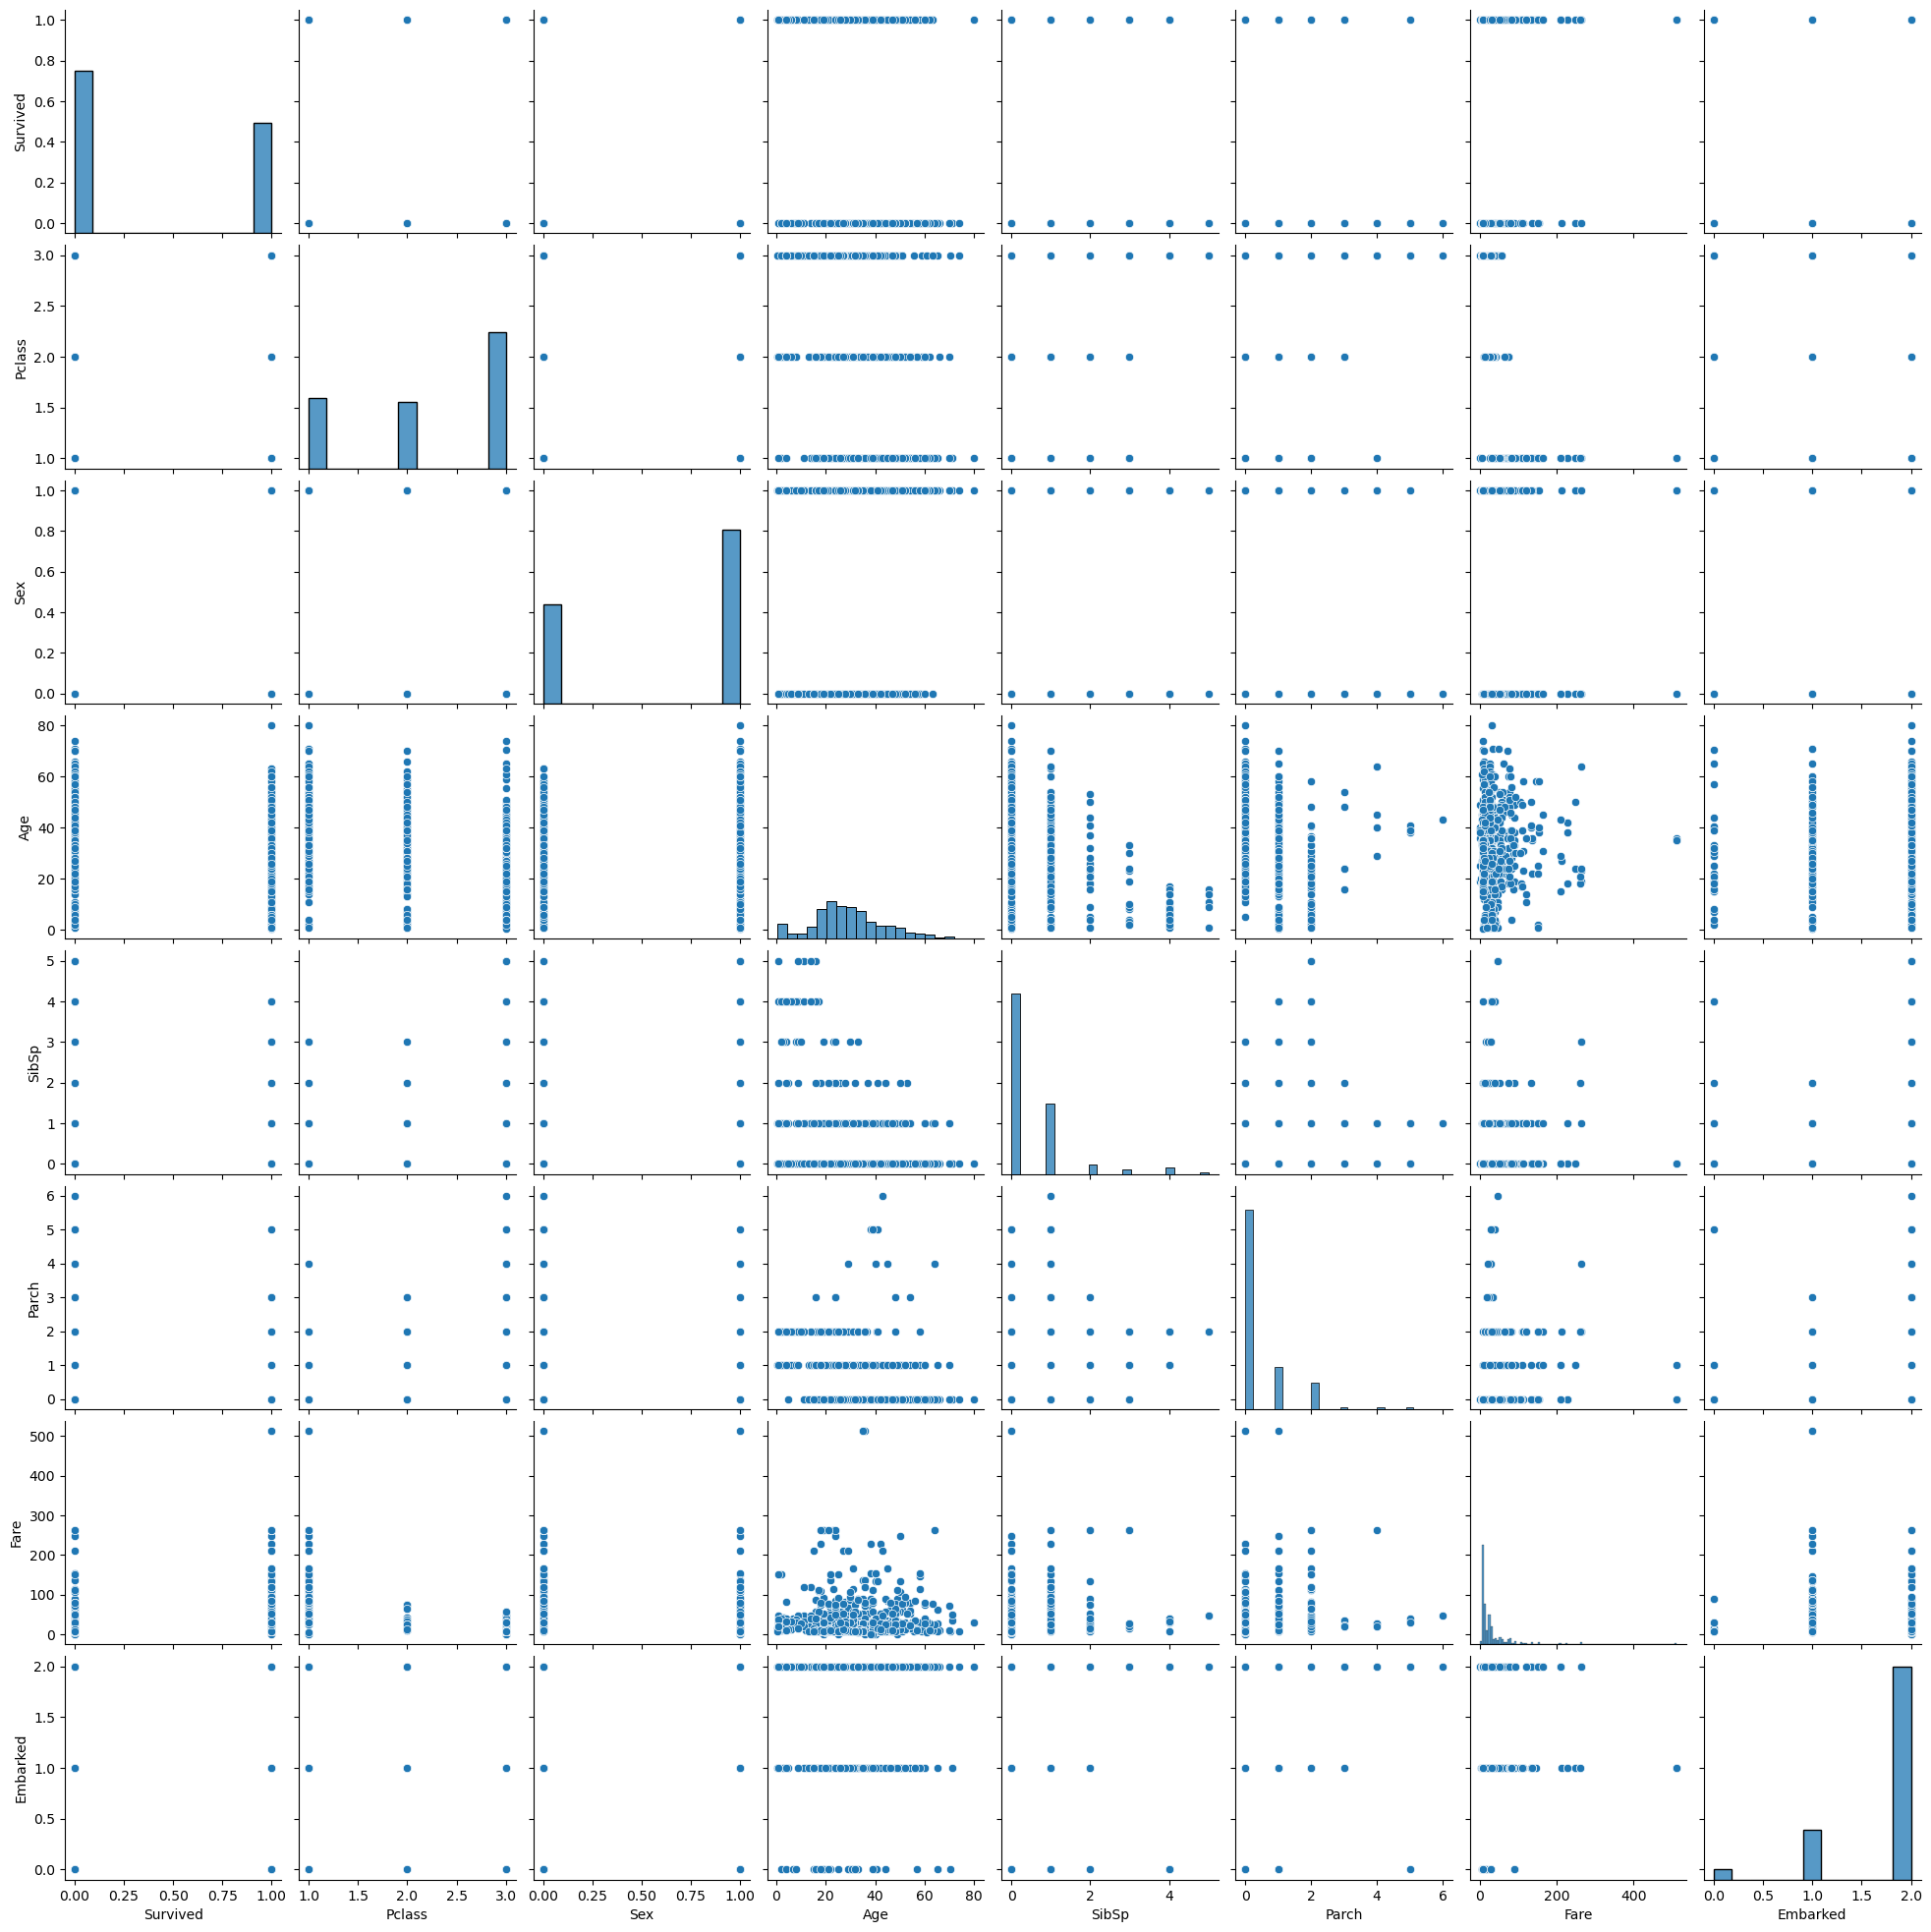

In [10]:
sns.pairplot(dftrain_cleaned)

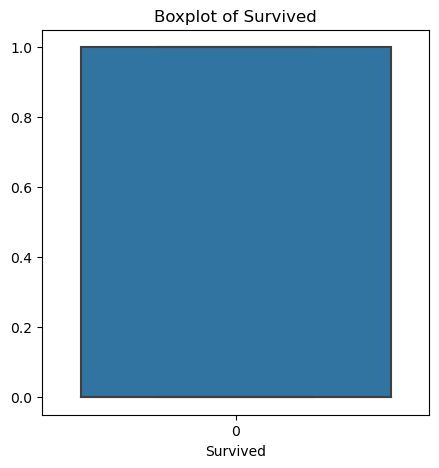

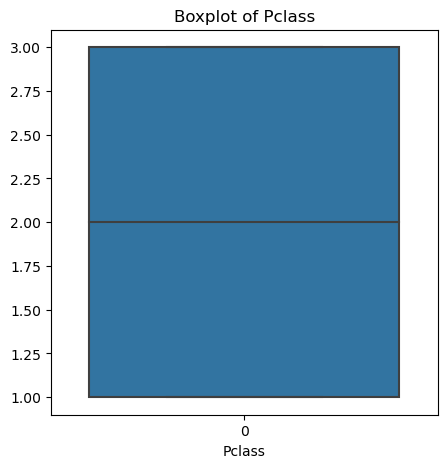

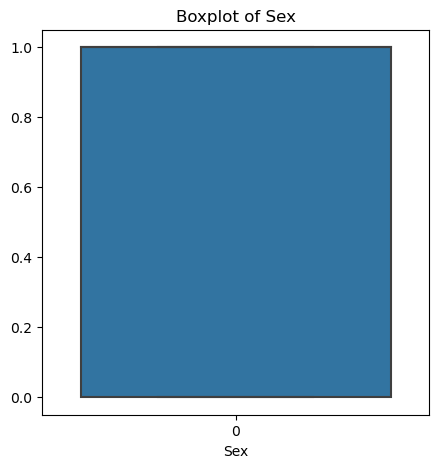

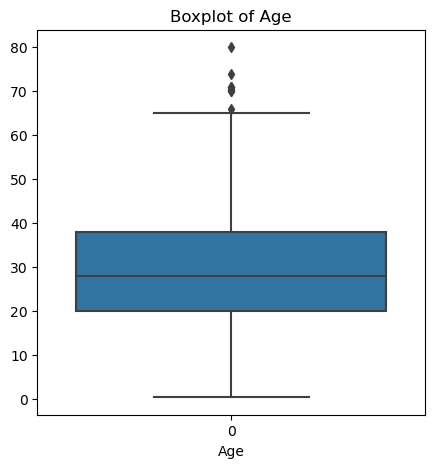

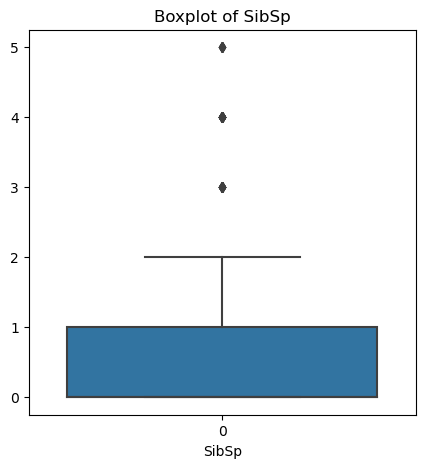

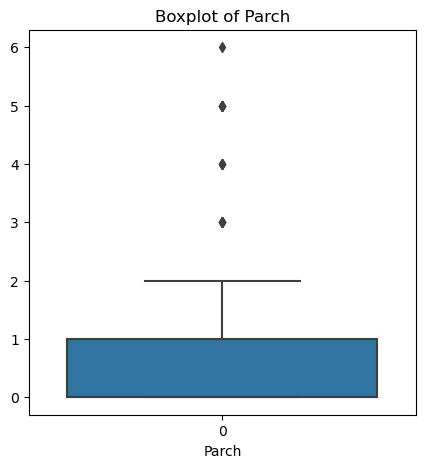

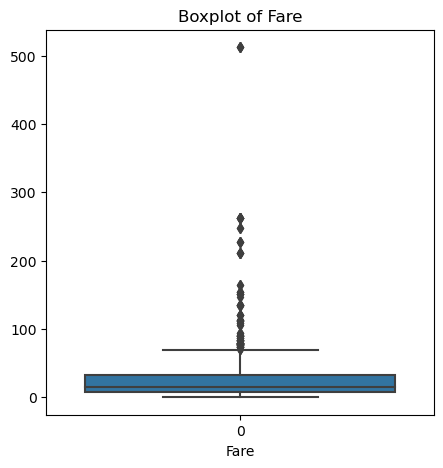

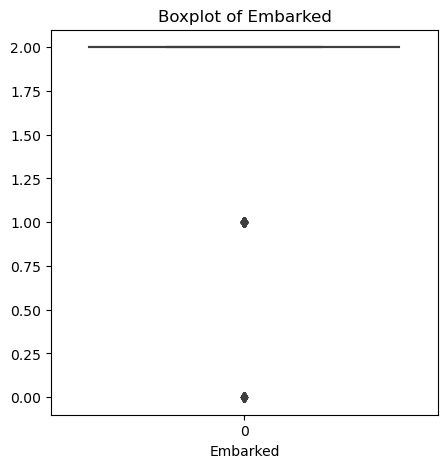

In [11]:
for col in dftrain_cleaned:
    plt.figure(figsize=(5, 5))
    sns.boxplot(dftrain_cleaned[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

In [12]:
print("Although there are outliers, these will help us train our model better. \nEspecially, the embarked boxplot shows only 2, the rest two as outliers\nwhich would be counterproductive")

Although there are outliers, these will help us train our model better. 
Especially, the embarked boxplot shows only 2, the rest two as outliers
which would be counterproductive


In [13]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression

x=dftrain_cleaned.drop('Survived', axis=1)
y=dftrain_cleaned['Survived']
x_train,x_test,y_train,y_test=tts(x,y,train_size=0.7,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((498, 7), (498,), (214, 7), (214,))

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
y_pred = model.predict(x_test)
y_pred.shape
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.7897196261682243
Precision: 0.7901234567901234
Recall: 0.6956521739130435
F1-score: 0.7398843930635839
ROC-AUC: 0.8111190306486101


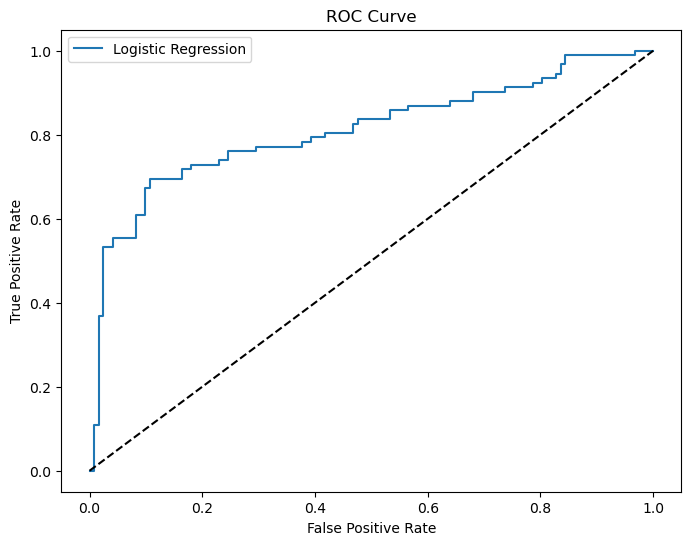

In [16]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [17]:
coefficients = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_[0]
})
print(coefficients.sort_values(by='Coefficient', ascending=False))

    Feature  Coefficient
4     Parch     0.032833
5      Fare     0.000036
2       Age    -0.039262
6  Embarked    -0.156309
3     SibSp    -0.280681
0    Pclass    -1.451036
1       Sex    -2.618768


In [18]:
!pip install streamlit

In [19]:
dftest=pd.read_csv(r"C:\Users\polpi\Desktop\data science\assignments\done\Logistic Regression\Titanic_test.csv")
dftest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [20]:
dftest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

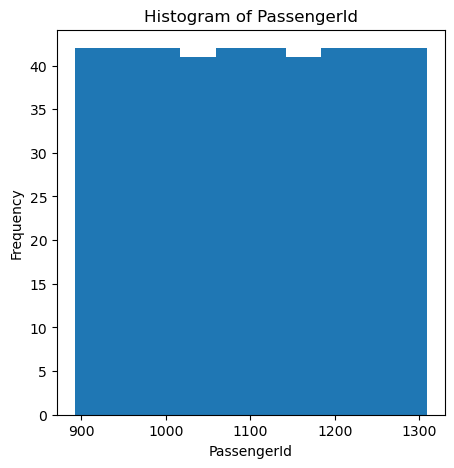

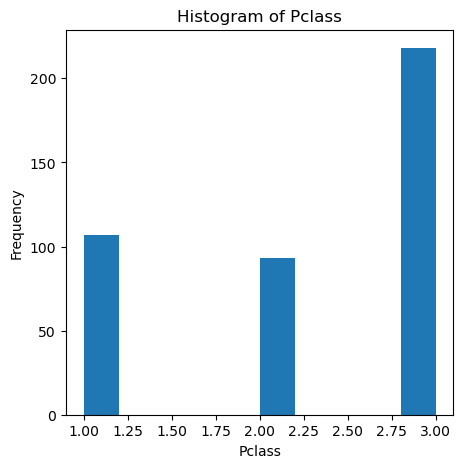

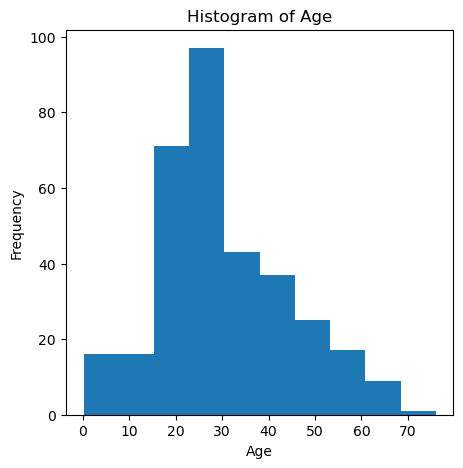

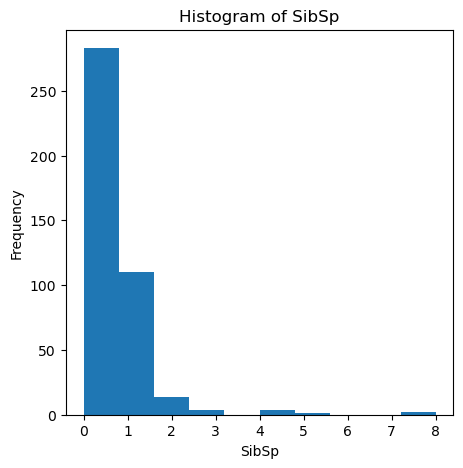

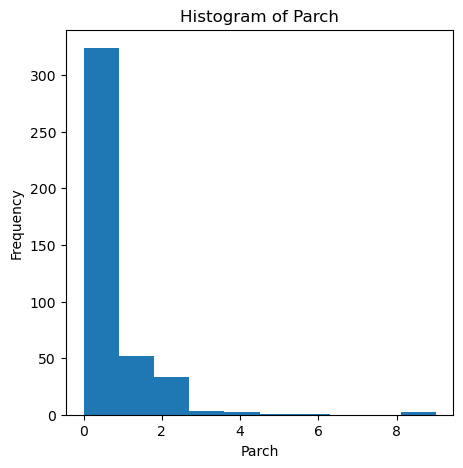

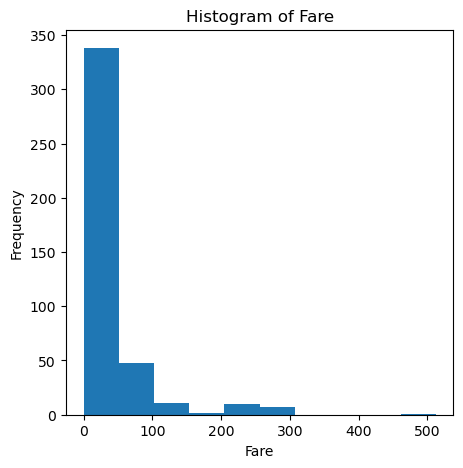

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
dftest_num = dftest.select_dtypes(include=['float64', 'int64'])
for col in dftest_num:
    plt.figure(figsize=(5, 5))
    plt.hist(dftest_num[col], bins=10)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [22]:
print("We will drop Cabin, Ticket and Name, as done fro train dataset")
dftest=dftest.drop(['Cabin','Ticket','Name'],axis=1)
dftest_cleaned=dftest.dropna()
dftest_cleaned

We will drop Cabin, Ticket and Name, as done fro train dataset


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
409,1301,3,female,3.0,1,1,13.7750,S
411,1303,1,female,37.0,1,0,90.0000,Q
412,1304,3,female,28.0,0,0,7.7750,S
414,1306,1,female,39.0,0,0,108.9000,C


In [23]:
unique_embark = dftest_cleaned['Embarked'].unique()
print(unique_embark)

['Q' 'S' 'C']


In [24]:
sex_typ={'male':1,'female':0}
embarked_typ={'S':2,'C':1,'Q':0}
dftest_cleaned['Sex'] = dftest_cleaned['Sex'].map(sex_typ)
dftest_cleaned['Embarked'] = dftest_cleaned['Embarked'].map(embarked_typ)
dftest_cleaned

C:\Users\polpi\AppData\Local\Temp\ipykernel_16524\1804017642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest_cleaned['Sex'] = dftest_cleaned['Sex'].map(sex_typ)
C:\Users\polpi\AppData\Local\Temp\ipykernel_16524\1804017642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest_cleaned['Embarked'] = dftest_cleaned['Embarked'].map(embarked_typ)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,0
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,0
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
409,1301,3,0,3.0,1,1,13.7750,2
411,1303,1,0,37.0,1,0,90.0000,0
412,1304,3,0,28.0,0,0,7.7750,2
414,1306,1,0,39.0,0,0,108.9000,1


In [25]:
dftest_cleaned.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,1100.232628,2.141994,0.616314,30.181269,0.483384,0.398792,40.982087,1.619335
std,122.910180,0.846251,0.487019,14.104573,0.875004,0.811582,61.228558,0.608117
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,992.500000,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000,1.000000
50%,1100.000000,2.000000,1.000000,27.000000,0.000000,0.000000,16.000000,2.000000
75%,1210.500000,3.000000,1.000000,39.000000,1.000000,1.000000,40.633350,2.000000
max,1307.000000,3.000000,1.000000,76.000000,8.000000,6.000000,512.329200,2.000000


In [27]:
x2_test = dftest_cleaned.drop(['PassengerId'], axis=1)

test_predictions = model.predict(x2_test)

dftest_filtered = dftest.loc[dftest_cleaned.index]

dftest_filtered['Survived'] = test_predictions

dftest_filtered.to_csv(r"C:\Users\polpi\Desktop\data science\assignments\done\Logistic Regression\titanic_test_predictions_filtered.csv", index=False)

print("Predictions saved to 'titanic_test_predictions_filtered.csv'.")

Predictions saved to 'titanic_test_predictions_filtered.csv'.


In [32]:
print("This dataframe shows the PassengerIDs and their survival as 0 or 1")
pd.DataFrame({'PassengerID':dftest_cleaned['PassengerId'], 'Predicted Data_Survival':test_predictions})

This dataframe shows the PassengerIDs and their survival as 0 or 1


,PassengerID,Predicted Data_Survival
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
409,1301,1
411,1303,1
412,1304,1
414,1306,1
